# 1. Introduction & Objectif
<a id="introduction--objectif"></a>

- Sur ce notebbok je cherche à analyser la qualité des fruits en utilisant plusieurs modèles de machine learning.

- Nous allons explorer et analyser un jeu de données concernant la qualité des pommes, afin d'identifier les facteurs influençant leur qualité, de détecter d'éventuelles anomalies ou valeurs aberrantes et de produire des visualisations facilitant une meilleure compréhension des données. 



# 2. Importation des bibliothèques
<a id="importation-des-bibliotheques"></a>

In [99]:
import os
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from scipy import stats
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,
    classification_report, confusion_matrix, roc_curve, auc
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [2]:
print("Voici les bibliotheques installées:")
print("La version du Python est :", os.sys.version)
print("La version de Pandas est :",pd.__version__)
print("La version de Numpy est :",np.__version__)
print("La version de Matplotlib est :", plt.matplotlib.__version__)
print("La version de seaborn est :", sns.__version__)

Voici les bibliotheques installées:
La version du Python est : 3.12.9 | packaged by Anaconda, Inc. | (main, Feb  6 2025, 18:56:27) [GCC 11.2.0]
La version de Pandas est : 2.2.3
La version de Numpy est : 2.2.2
La version de Matplotlib est : 3.10.0
La version de seaborn est : 0.13.2


# 3. Chargement des données
<a id="Chargement des donnees"></a>

In [4]:
df=pd.read_csv("../data/apple_quality.csv")

# 4. Exploration et visualisation des données
<a id="exploration-et-visualisation-des-données"></a>

## 4.1 Aperçu des données
<a id="aperçu-des-données"></a>

In [7]:
def explore(df,name):
    
    print(f"Aperçu de la table {name} :")
    
    print("Les 5 prémières lignes :")
    display(df.head())
    
    print("Des infos sur les colonnes :")
    print(df.info())
    
    print("Valeurs manquantes par colonne :")
    print(df.isna().sum())
    
    print("Ls statistiques générales :")
    display(df.describe())
    
    print("Les valeurs uniques :")
    print(df.nunique())

In [8]:
explore(df,"Caracteristiques des pommes")

Aperçu de la table Caracteristiques des pommes :
Les 5 prémières lignes :


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


Des infos sur les colonnes :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB
None
Valeurs manquantes par colonne :
A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64
Ls statistiques générales :


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


Les valeurs uniques :
A_id           4000
Size           4000
Weight         4000
Sweetness      4000
Crunchiness    4000
Juiciness      4000
Ripeness       4000
Acidity        4001
Quality           2
dtype: int64


- Notre dataset compte 4001 observations et 9 colonnes, la colonne A_id est l'identifiant unique donc pas trop utile pour notre modèle, 7 variables sont continues et la dernière variable quality qui est notre variable cible est categorielle.

- nous avons une valeur manquante par variable nous allons donc supprimer cette ligne, le type de la variable acidity est object nous allons le transformer en float.

- Pour toutes nos variables nous pouvons penser qu'il y'a une présence de valeurs extrêmes car l'ecart min max est trés élvevés.

In [10]:
# Suppresion de la ligne contenant des NAN
df=df.dropna()

# Converion en float
df["Acidity"]=df["Acidity"].astype(float)

In [12]:
# Transformation de la variable cible
df["Quality"]=df["Quality"].str.strip().str.lower()
df["Quality"]=df["Quality"].map({'good': 0, 'bad': 1})
df=df.drop(columns=["A_id"])

## 4.2 Analyse-Univariée
<a id="analyse-univariée"></a>

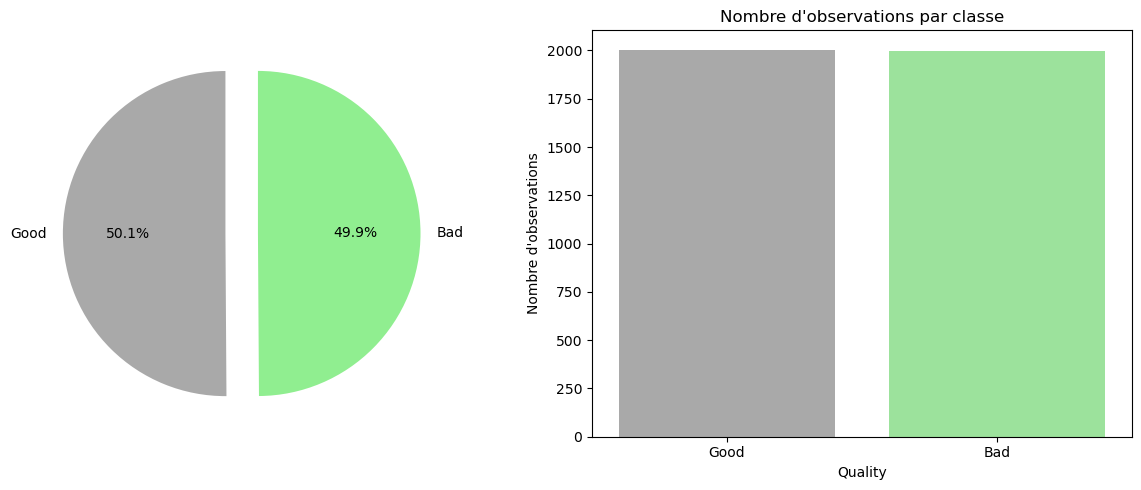

In [13]:
# On calcul les occurences
label_c=df["Quality"].value_counts()
labels=['Good', 'Bad']

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.pie(label_c, labels=labels, autopct='%1.1f%%', 
        startangle=90, colors=['darkgrey', 'lightgreen'], explode=(0.1, 0.1))

plt.subplot(1,2,2)
sns.barplot(x=label_c.index, y=label_c.values, hue=label_c.index, palette=['darkgrey', 'lightgreen'], legend=False)
plt.xticks(ticks=[0, 1], labels=['Good', 'Bad'])
plt.ylabel('Nombre d\'observations')
plt.title('Nombre d\'observations par classe')

plt.tight_layout()
plt.show()

- Dans notre dataset nous observons que les classes sont bien équilibrées cela est parfait pour notre modèle de machine learning cela nous permet donc d'eviter le biais de classification(quand un modèele apprendre à prédire majoritairement une seule classe).

In [14]:
def plot_histo(df, column, title):
    
    shapiro_test=stats.shapiro(df[column])
    p_value=shapiro_test.pvalue
    print(f"La P-value du test de Shapiro-Wilk pour '{column}' est : {p_value:.5f}")
    if p_value <0.05:
        print(f"Les valeurs de '{column}' ne suivent pas une distribution normale")
    else:
        print(f"Les valeurs de '{column}' suivent une distribution normale")
    fig, ax=plt.subplots(2, 1, figsize=(10, 7), gridspec_kw={'height_ratios': [3, 1]}, sharex=True)

    
    hist_color="darkgrey"  
    boxplot_color="lightgreen"  

    # Histogramme
    sns.histplot(df[column],  color=hist_color, alpha=0.7, ax=ax[0])
    ax[0].set_ylabel("Fréquence")
    ax[0].set_title(title, fontsize=12)

    # Boxplot
    sns.boxplot(x=df[column], color=boxplot_color, ax=ax[1])
    ax[1].set_title(f"Boxplot de {column}", fontsize=12)
    ax[1].set_xlabel(column)

    # Affichage
    plt.show()

La P-value du test de Shapiro-Wilk pour 'Size' est : 0.78573
Les valeurs de 'Size' suivent une distribution normale


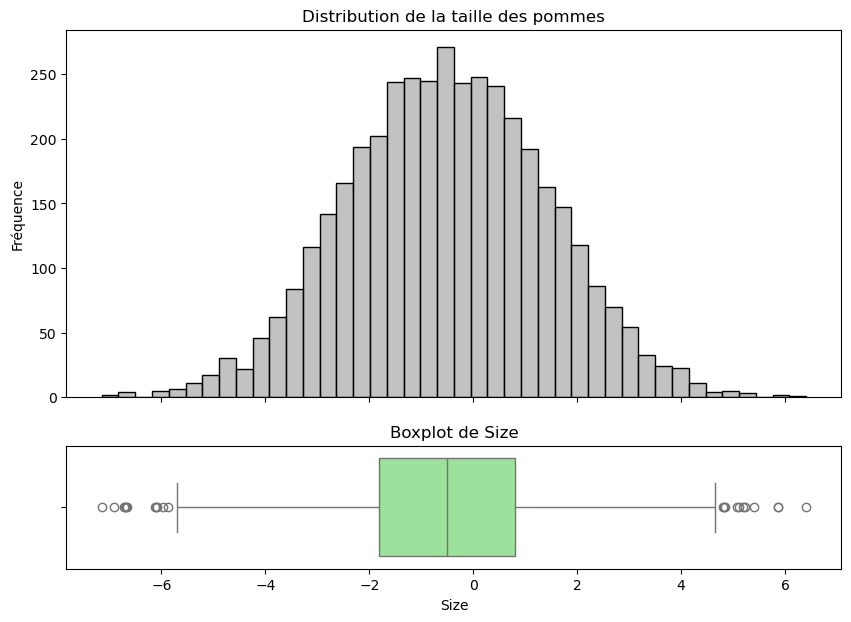

In [15]:
plot_histo(df, "Size", "Distribution de la taille des pommes")

La P-value du test de Shapiro-Wilk pour 'Weight' est : 0.00072
Les valeurs de 'Weight' ne suivent pas une distribution normale


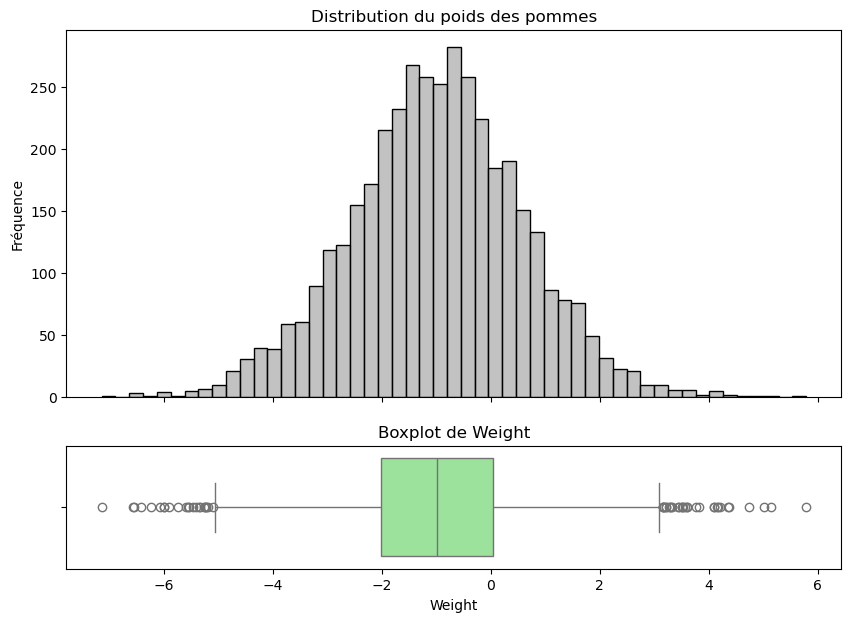

In [16]:
plot_histo(df, "Weight", "Distribution du poids des pommes")

La P-value du test de Shapiro-Wilk pour 'Sweetness' est : 0.01345
Les valeurs de 'Sweetness' ne suivent pas une distribution normale


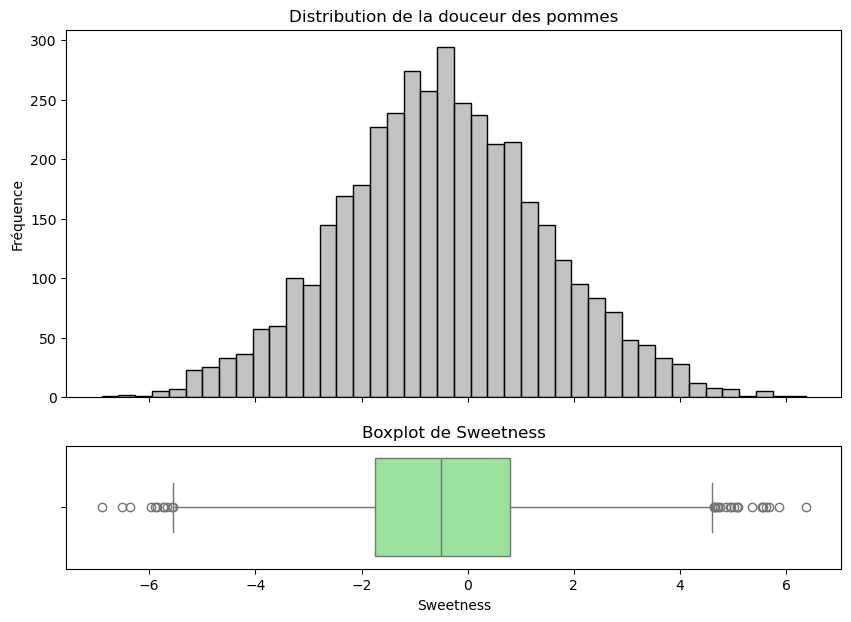

In [17]:
plot_histo(df, "Sweetness", "Distribution de la douceur des pommes")

La P-value du test de Shapiro-Wilk pour 'Crunchiness' est : 0.00000
Les valeurs de 'Crunchiness' ne suivent pas une distribution normale


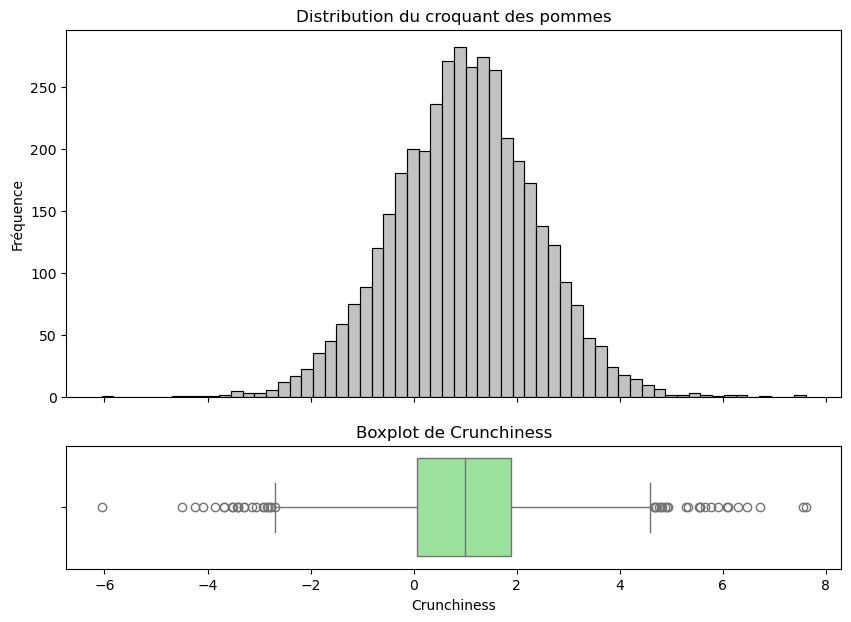

In [18]:
plot_histo(df, "Crunchiness", "Distribution du croquant des pommes")

La P-value du test de Shapiro-Wilk pour 'Juiciness' est : 0.00837
Les valeurs de 'Juiciness' ne suivent pas une distribution normale


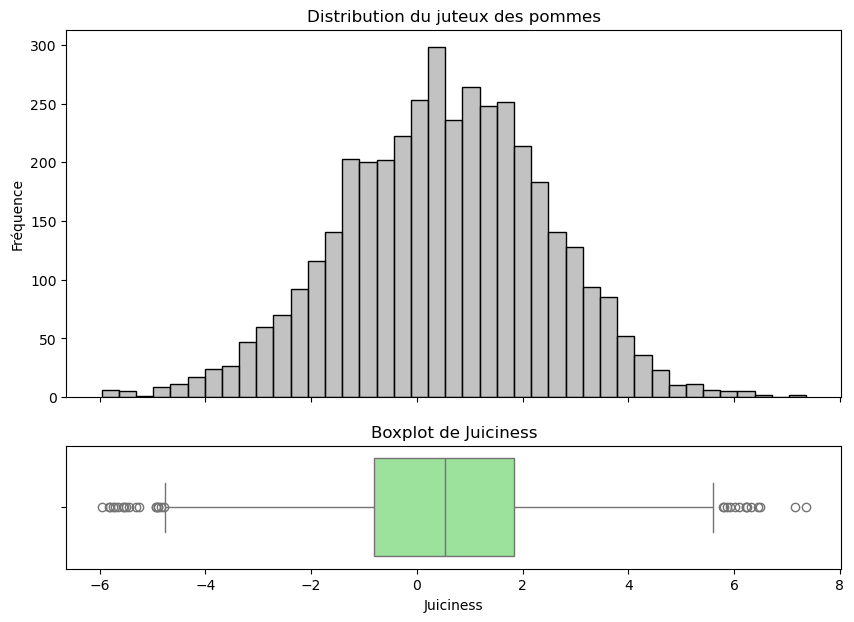

In [19]:
plot_histo(df, "Juiciness", "Distribution du juteux des pommes")

La P-value du test de Shapiro-Wilk pour 'Ripeness' est : 0.83907
Les valeurs de 'Ripeness' suivent une distribution normale


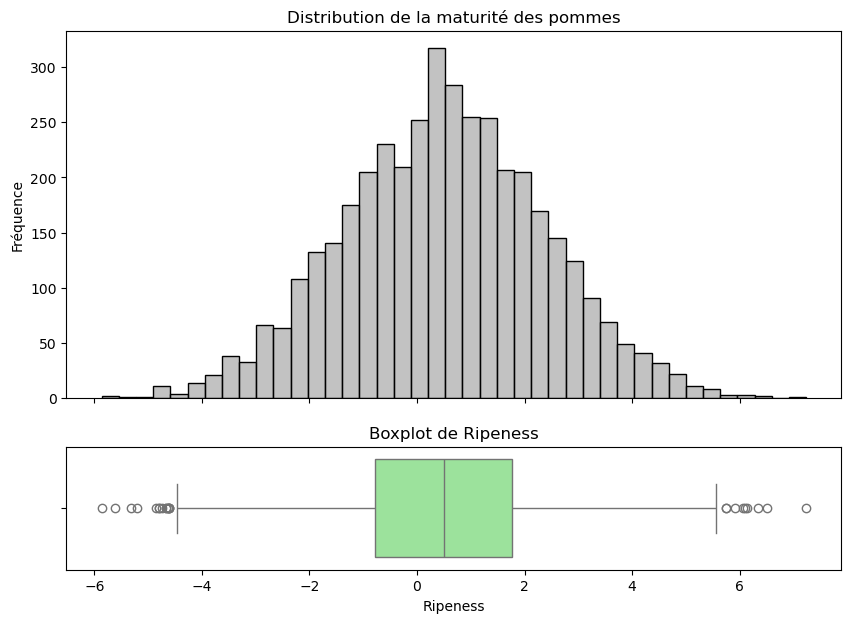

In [20]:
plot_histo(df, "Ripeness", "Distribution de la maturité des pommes")

La P-value du test de Shapiro-Wilk pour 'Acidity' est : 0.16060
Les valeurs de 'Acidity' suivent une distribution normale


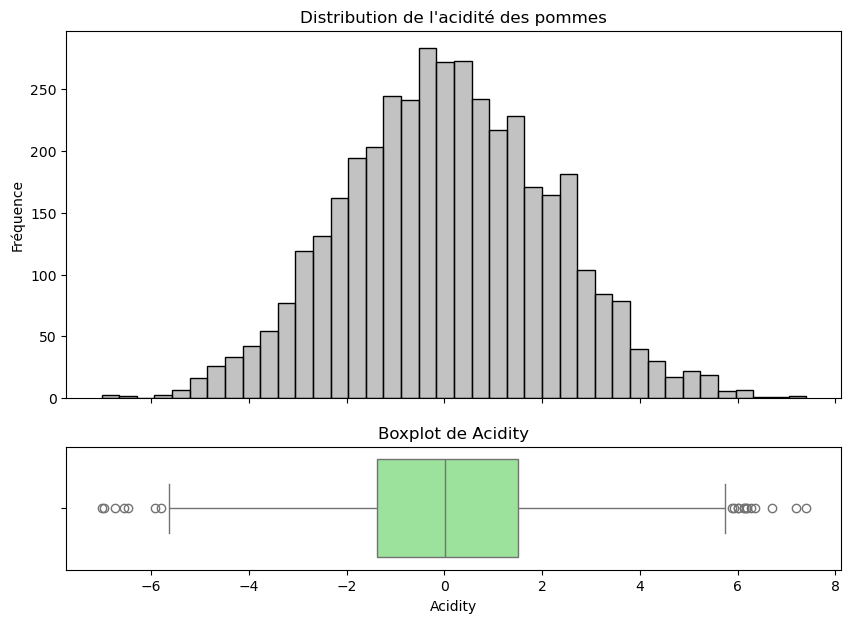

In [21]:
plot_histo(df, "Acidity", "Distribution de l'acidité des pommes")

- Nous avons 3 variables qui sont bie réparties autour de leur moyenne ( Size, Ripeness et Acidity), le reste des variables ne suivent pas une distribution normale.

- Nous observons également la présence des valeurs extrêmes pour toutes les variables, en particulier pour Weight, Sweetness, Crunchiness et Juiciness.

- Nous allons appliquer quelques transformations

## 4.3 Analyse-Bivariée
<a id="analyse-bivariée"></a>

In [36]:
def plot_correlation(df, title="Matrice de corrélation"):
    df_corr=df.select_dtypes(include=["number"]).corr()
    plt.figure(figsize=(12,8))
    sns.heatmap(df_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title(title,fontsize=14)
    plt.show()


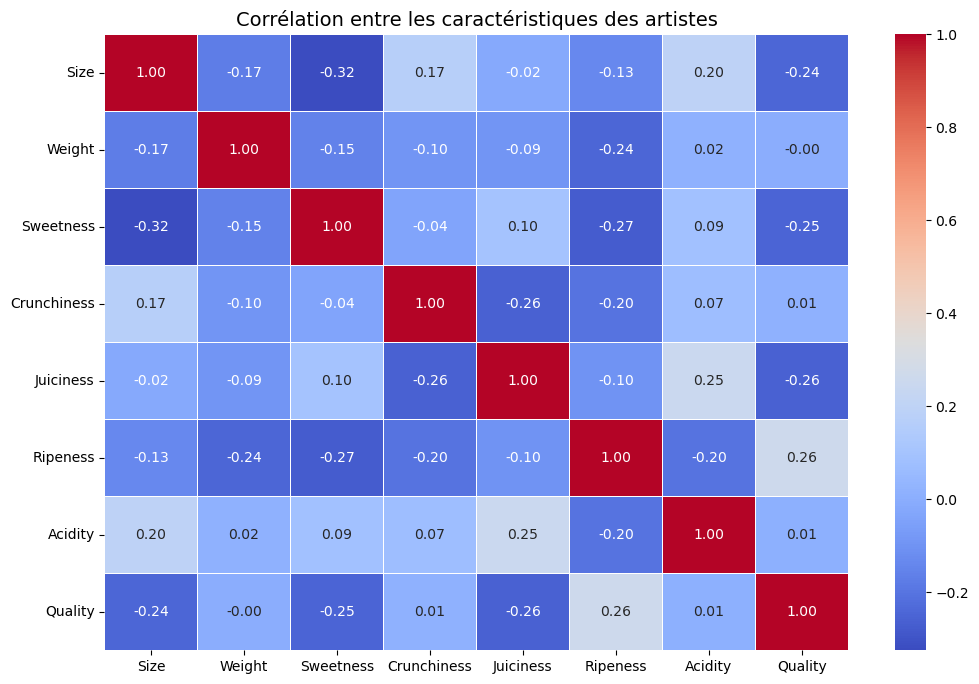

In [23]:
plot_correlation(df, title="Corrélation entre les caractéristiques des artistes")

- Nous avons de faible corrélation entre les variables, Size et Sweetness sont modérément corrélées négativement avec Quality (-0.24 et -0.25).

- Nous n'avons acune forte corrélation avec la variable cible, nous allons tester des interactions.

# 5 Pretraitement des donnees
<a id="pretraitement-des-donnees"></a>

In [37]:
# Separation des variables
X = df.drop(columns=["Quality"])  
y = df["Quality"]  


In [38]:
# Separation en train/test
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Initialisation des Scalers
minmax_scaler=MinMaxScaler()
standard_scaler=StandardScaler()
robust_scaler=RobustScaler()

In [43]:
# Normalisation avec MinMax
X_train_minmax=pd.DataFrame(minmax_scaler.fit_transform(X_train), columns=X_train.columns)
X_test_minmax=pd.DataFrame(minmax_scaler.transform(X_test), columns=X_test.columns)


In [ ]:
# Normalisation avec StandardScaler
X_train_standard=pd.DataFrame(standard_scaler.fit_transform(X_train), columns=X_train.columns)
X_test_standard=pd.DataFrame(standard_scaler.transform(X_test), columns=X_test.columns)

In [45]:
# Normalisation avec RobustScaler
X_train_robust=pd.DataFrame(robust_scaler.fit_transform(X_train), columns=X_train.columns)
X_test_robust=pd.DataFrame(robust_scaler.transform(X_test), columns=X_test.columns)


# 6 Les Modeles 

## 6.1 Modele : XGBOOST

- Pour un début nous allons tester ce modèle comme il n'exige pas que les variables suivent une distribution normale.

- Il est trés utile dans notre cas vu la présence de beuacoup de valeurs aberantes, via sa fonction de perte robuste les valeurs aberantes vont avoir moins de poids.

In [66]:
# Entrainement de notre modele
xgb=XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [67]:
# Prediction sur l'enseble test 
y_pred_xgb=xgb.predict(X_test)
y_proba_xgb=xgb.predict_proba(X_test)[:, 1] 

In [68]:
# Évaluation 
xgb_accuracy=accuracy_score(y_test, y_pred_xgb)
xgb_f1=f1_score(y_test, y_pred_xgb, average='weighted')
xgb_precision=precision_score(y_test, y_pred_xgb, average='weighted')
xgb_recall=recall_score(y_test, y_pred_xgb, average='weighted')
xgb_roc_auc=roc_auc_score(y_test, y_proba_xgb)

In [73]:
print("L'Accuracy est :",xgb_accuracy)
print("Le F1 Score est :",xgb_f1)
print("La Precion est :", xgb_precision)
print("Le recall est :", xgb_recall)
print("La valeur de ROC est :",xgb_roc_auc)

L'Accuracy est : 0.905
Le F1 Score est : 0.9049667366946779
La Precion est : 0.9054884994523549
Le recall est : 0.905
La valeur de ROC est : 0.9612185076156726


In [71]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       399
           1       0.89      0.92      0.91       401

    accuracy                           0.91       800
   macro avg       0.91      0.90      0.90       800
weighted avg       0.91      0.91      0.90       800



- Voici les resultats de notre modèle de XGBoost :
    
  - Accuracy : Le modèle est globalement précis, il a pu classé environ 91% des fruits.

  - ROC-AUC : Nous avons également une bonne séparation des deux classes (96.1%).

  - Recall (1) : Le modèle identifie bien les mauvais fruits (92%).
  
  - Précision (0) : Le modèle classe également correctement les bons fruits (92%).
  - Nous avons egalement un bon équilibre entre précision et recall.

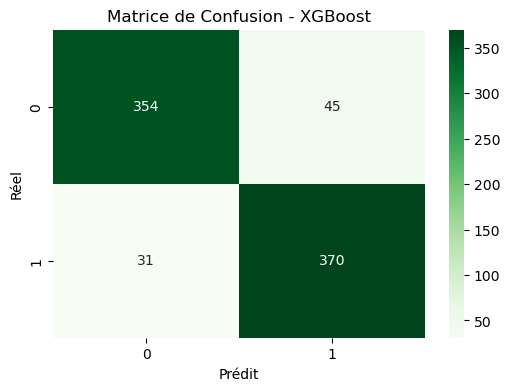

In [54]:
# Matrice de confusion
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, cmap='Greens', fmt='d')
plt.title('Matrice de Confusion - XGBoost')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()

- Notre modéle classifie 354 bons fruits et 370 mauvais fruits de façon correcte, puis nous avons 45 bons fruits (FN) et 31 mauvaos fruits (FP).

## 6.2 Modele RandomForest

- Comme nous avons des valeurs aberrantes pour toutes les variables le modele de Random Forest est utile car il est insensibles à cela.

L'Accuracy est : 0.89875
Le F1 Score est : 0.8987444626743232
La Precion est : 0.8988765753544548
Le recall est : 0.89875
La valeur de ROC est : 0.9574684841780262
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       399
           1       0.91      0.89      0.90       401

    accuracy                           0.90       800
   macro avg       0.90      0.90      0.90       800
weighted avg       0.90      0.90      0.90       800



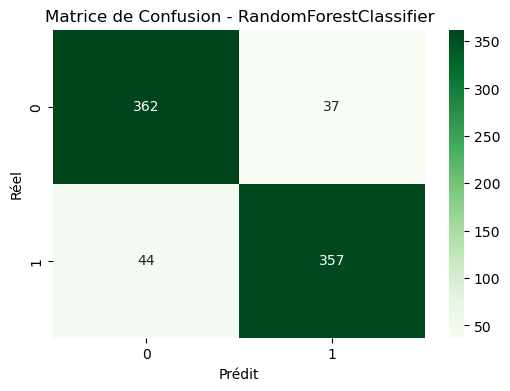

In [74]:
# Entrainement du modele.
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Prédictions 
y_pred_rf=rf.predict(X_test)
y_proba_rf=rf.predict_proba(X_test)[:, 1]

# Evaluation  
rf_accuracy=accuracy_score(y_test, y_pred_rf)
rf_f1=f1_score(y_test, y_pred_rf, average='weighted')
rf_precision=precision_score(y_test, y_pred_rf, average='weighted')
rf_recall=recall_score(y_test, y_pred_rf, average='weighted')
rf_roc_auc=roc_auc_score(y_test, y_proba_rf)

print("L'Accuracy est :",rf_accuracy)
print("Le F1 Score est :",rf_f1)
print("La Precion est :", rf_precision)
print("Le recall est :", rf_recall)
print("La valeur de ROC est :",rf_roc_auc)

# Rapport complet RandomForest
print(classification_report(y_test, y_pred_rf))

# Matrice de confusion RandomForest
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, cmap='Greens', fmt='d')
plt.title('Matrice de Confusion - RandomForestClassifier')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()


- Voici les resultats de notre modèle Random Forest :
    
    - Accuracy = 89.9 %  Un peu plus faible que XGBoost (90.5 %), donc légèrement moins précis globalement.
    
    - ROC-AUC = 95.7 %  Très bon score, mais inférieur à celui de XGBoost (96.1 %), donc une légère perte de séparation des classes.
    
    - Recall pour les mauvais fruits (1) = 89 %  Moins bon que XGBoost (92 %), donc plus de mauvais fruits mal détectés.
    
    - Précision pour les bons fruits (0) = 89 % Légèrement plus faible que XGBoost (92 %), donc plus de bons fruits rejetés à tort.
    
    - Il detecte mieux les bons fruits (362) et donc juste 37 faux négatifs.

## 6.3 Modele 3 LGBMClassifier 

- Nous allons tester une alternative à XGBOOST avec des hyperparametres par defaut pour essayer d'ameliorer le modele.

[LightGBM] [Info] Number of positive: 1595, number of negative: 1605
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000473 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3315
[LightGBM] [Info] Number of data points in the train set: 3200, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498437 -> initscore=-0.006250
[LightGBM] [Info] Start training from score -0.006250
L'Accuracy est : 0.905
Le F1 Score est : 0.9049572283468506
La Précision est : 0.9056396553775258
Le Recall est : 0.905
La valeur de ROC est : 0.9610185063656648
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       399
           1       0.89      0.93      0.91       401

    accuracy                           0.91       800
   macro avg       0.91      0.90      0.90       800
weighted avg       0.91      0.91      0.90       800



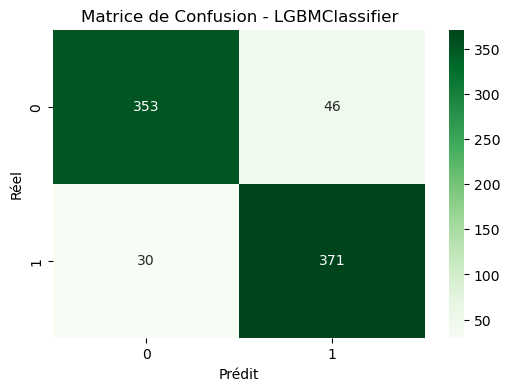

In [75]:
 # Entraînement du modèle LGBMClassifier
lgbm=LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)

# Prédictions 
y_pred_lgbm=lgbm.predict(X_test)
y_proba_lgbm=lgbm.predict_proba(X_test)[:, 1]

# Évaluation  
lgbm_accuracy=accuracy_score(y_test, y_pred_lgbm)
lgbm_f1=f1_score(y_test, y_pred_lgbm, average='weighted')
lgbm_precision=precision_score(y_test, y_pred_lgbm, average='weighted')
lgbm_recall=recall_score(y_test, y_pred_lgbm, average='weighted')
lgbm_roc_auc=roc_auc_score(y_test, y_proba_lgbm)

# Affichage des métriques
print("L'Accuracy est :", lgbm_accuracy)
print("Le F1 Score est :", lgbm_f1)
print("La Précision est :", lgbm_precision)
print("Le Recall est :", lgbm_recall)
print("La valeur de ROC est :", lgbm_roc_auc)

# Rapport complet LGBMClassifier
print(classification_report(y_test, y_pred_lgbm))

# Matrice de confusion LGBMClassifier
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_lgbm), annot=True, cmap='Greens', fmt='d')
plt.title('Matrice de Confusion - LGBMClassifier')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()

- Voici les resultats de notre modèle LGBMClassifier :

    - Nous avons des performance quasi identiques à XHBoost avec une légère amélioration sur la précision (90.6%).

## 6.4 Modele 4 :  KNeighbors avec Standard Scaller.

- Nous allons aussi tester un modèle non parametrique qui classe en fonction de la proximité avec les voisins.
- Nous allons standardiser car le modele est sensible.

L'Accuracy est : 0.8875
Le F1 Score est : 0.8874704621039734
La Précision est : 0.8879850435772787
Le Recall est : 0.8875
La valeur de ROC est : 0.9515028218926367
              precision    recall  f1-score   support

           0       0.87      0.90      0.89       399
           1       0.90      0.87      0.89       401

    accuracy                           0.89       800
   macro avg       0.89      0.89      0.89       800
weighted avg       0.89      0.89      0.89       800



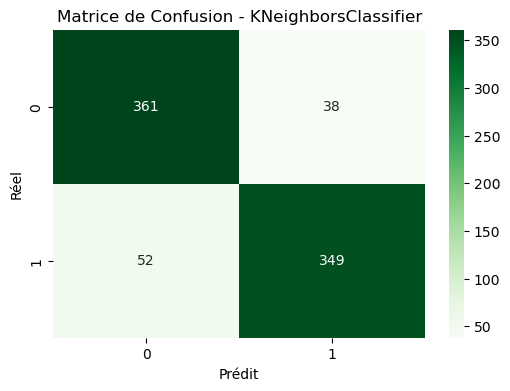

In [77]:
# Entraînement du modèle KNN
knn=KNeighborsClassifier()
knn.fit(X_train_standard, y_train)

# Prédictions
y_pred_knn=knn.predict(X_test_standard)
y_proba_knn=knn.predict_proba(X_test_standard)[:, 1]

# Évaluation
knn_accuracy=accuracy_score(y_test, y_pred_knn)
knn_f1=f1_score(y_test, y_pred_knn, average='weighted')
knn_precision=precision_score(y_test, y_pred_knn, average='weighted')
knn_recall=recall_score(y_test, y_pred_knn, average='weighted')
knn_roc_auc=roc_auc_score(y_test, y_proba_knn)

# Affichage des métriques
print("L'Accuracy est :", knn_accuracy)
print("Le F1 Score est :", knn_f1)
print("La Précision est :", knn_precision)
print("Le Recall est :", knn_recall)
print("La valeur de ROC est :", knn_roc_auc)

# Rapport complet KNN
print(classification_report(y_test, y_pred_knn))

# Matrice de confusion KNN
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, cmap='Greens', fmt='d')
plt.title('Matrice de Confusion - KNeighborsClassifier')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()

- Voici les resultats de notre modèle LGBMClassifier :
    
    - Accuracy légèrement inférieur aux autres, il détecte moins bien les mauvais fruits.
    - Pour le moment c'est le modèle le moins performant sur notre dataset.

## 6.5 Modele 5 : SVC avec Min-Max Scaler

L'Accuracy est : 0.905
Le F1 Score est : 0.9049928745991963
La Précision est : 0.9051668010828317
Le Recall est : 0.905
La valeur de ROC est : 0.959812248826555
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       399
           1       0.91      0.90      0.90       401

    accuracy                           0.91       800
   macro avg       0.91      0.91      0.90       800
weighted avg       0.91      0.91      0.90       800



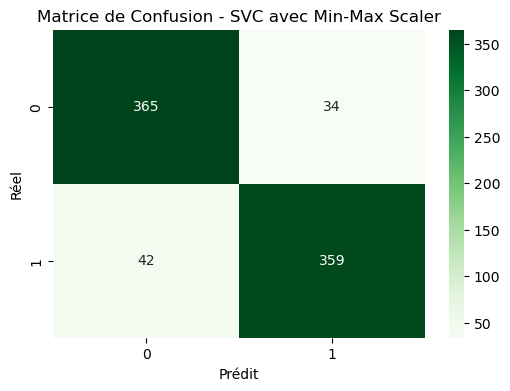

In [85]:
svc = SVC(probability=True, random_state=42)
svc.fit(X_train_minmax, y_train)

# Prédictions
y_pred_svc=svc.predict(X_test_minmax)
y_proba_svc=svc.predict_proba(X_test_minmax)[:, 1] 

# Évaluation
svc_accuracy=accuracy_score(y_test, y_pred_svc)
svc_f1=f1_score(y_test, y_pred_svc, average='weighted')
svc_precision=precision_score(y_test, y_pred_svc, average='weighted')
svc_recall=recall_score(y_test, y_pred_svc, average='weighted')
svc_roc_auc=roc_auc_score(y_test, y_proba_svc)

# Affichage des métriques
print("L'Accuracy est :", svc_accuracy)
print("Le F1 Score est :", svc_f1)
print("La Précision est :", svc_precision)
print("Le Recall est :", svc_recall)
print("La valeur de ROC est :", svc_roc_auc)

# Rapport complet SVC
print(classification_report(y_test, y_pred_svc))

# Matrice de confusion SVC
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_svc), annot=True, cmap='Greens', fmt='d')
plt.title('Matrice de Confusion - SVC avec Min-Max Scaler')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()

    - Accuracy de 90.5%, identique à XGBoost et LGBM et meilleure que Random Forest (89.9%) et KNN (88.7%).

    - ROC-AUC de 95.9%, un peu en dessous de XGBoost et LGBM (96.1%), mais mieux que Random Forest (95.7%) et KNN (95.1%).

    - SVC classe mieux les bons fruits : 365 corrects vs 354 pour XGBoost et 353 pour LGBM.
    
    - Il détecte un peu moins bien les mauvais fruits que XGBoost et LGBM (359 corrects vs 370-371 pour eux)

## 6.6 Modele 6 XGBOOST Optimiser.

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/sit

[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.4s


/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/sit

[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.7s


/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/sit

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.8s


/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.6; total time=   0.3s


/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.6; total time=   0.3s


/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.4s


/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/sit

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.4s


/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/sit

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=1.0; total time=   1.8s


/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.6; total time=   0.7s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.2, max_depth=10, n_estimators=50, subsample=0.8; total time=   0.5s


/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.2, max_depth=10, n_estimators=50, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.2, max_depth=10, n_estimators=50, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.6; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.6; total time=   1.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.2, max_depth=10, n_estimators=50, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.2, max_depth=10, n_estimators=50, subsample=0.8; total time=   0.9s


/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/sit

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.6; total time=   1.1s


/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=50, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=50, subsample=0.6; total time=   0.5s


/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=50, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=50, subsample=0.6; total time=   0.4s


/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=50, subsample=0.6; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=   1.9s


/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=   1.9s


/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.7s


/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=   3.1s


/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.8s


/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:34] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=7, n_estimators=500, subsample=0.6; total time=   3.6s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1.0; total time=   1.6s


/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1.0; total time=   1.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=7, n_estimators=500, subsample=0.6; total time=   3.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=7, n_estimators=500, subsample=0.6; total time=   3.5s


/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/sit

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.2s


/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.3s


/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.9s


/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.8; total time=   1.1s


/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.8; total time=   1.9s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.8; total time=   1.9s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.8; total time=   1.7s


/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.8; total time=   1.9s


/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=7, n_estimators=500, subsample=0.6; total time=   7.0s


/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=10, n_estimators=200, subsample=0.6; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=5, n_estimators=50, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=10, n_estimators=200, subsample=0.6; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=10, n_estimators=200, subsample=0.6; total time=   2.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=10, n_estimators=200, subsample=0.6; total time=   1.1s


/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/sit

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=5, n_estimators=50, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=5, n_estimators=50, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=7, n_estimators=500, subsample=0.6; total time=   7.2s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.8; total time=   2.9s


/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/sit

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=5, n_estimators=50, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=10, n_estimators=200, subsample=0.6; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=5, n_estimators=50, subsample=0.6; total time=   0.4s


/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.6; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.6; total time=   0.6s


/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.6; total time=   0.9s


/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.6; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.6; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.6; total time=   0.9s


/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/sit

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.6; total time=   0.9s


/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.6; total time=   1.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.6; total time=   1.7s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.2, max_depth=10, n_estimators=300, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.2, max_depth=10, n_estimators=300, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.2, max_depth=10, n_estimators=300, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.2, max_depth=10, n_estimators=300, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.2, max_depth=10, n_estimators=300, subsample=0.8; tota

/home/saikou/anaconda3/envs/fruit_quality_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:53:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Meilleurs hyperparamètres : {'subsample': 0.6, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 1.0}
L'Accuracy après tuning : 0.91
Le F1 Score après tuning : 0.9099988749718743
La Précision après tuning : 0.9100091255133101
Le Recall après tuning : 0.91
La valeur de ROC après tuning : 0.9631560197251233
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       399
           1       0.91      0.91      0.91       401

    accuracy                           0.91       800
   macro avg       0.91      0.91      0.91       800
weighted avg       0.91      0.91      0.91       800



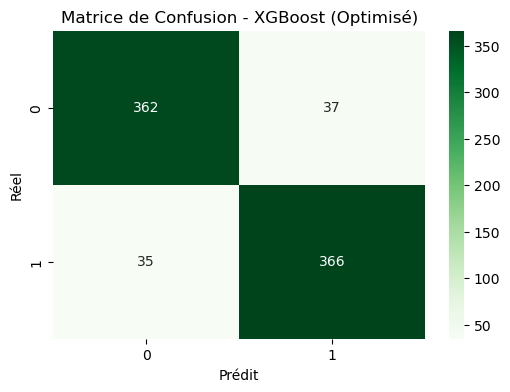

In [89]:
# Définition de la grille de recherche des hyperparamètres
param_grid = {
    'n_estimators': [50, 100, 200, 300, 500],  
    'max_depth': [3, 5, 7, 10],  
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  
    'subsample': [0.6, 0.8, 1.0], 
    'colsample_bytree': [0.6, 0.8, 1.0],  
    'gamma': [0, 0.1, 0.2, 0.3], 
}

# Initialisation du modèle XGBoost
xgb=XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Recherche aléatoire des meilleurs hyperparamètres
random_search=RandomizedSearchCV(
    xgb, param_distributions=param_grid,
    n_iter=20, scoring='accuracy', cv=5, verbose=2, n_jobs=-1, random_state=42
)

# Entraînement de la recherche
random_search.fit(X_train, y_train)

# Affichage des meilleurs hyperparamètres
print("Meilleurs hyperparamètres :", random_search.best_params_)

# Évaluation du modèle optimisé
best_xgb=random_search.best_estimator_
y_pred_best_xgb=best_xgb.predict(X_test)
y_proba_best_xgb=best_xgb.predict_proba(X_test)[:, 1]

# Calcul des métriques
best_xgb_accuracy=accuracy_score(y_test, y_pred_best_xgb)
best_xgb_f1=f1_score(y_test, y_pred_best_xgb, average='weighted')
best_xgb_precision=precision_score(y_test, y_pred_best_xgb, average='weighted')
best_xgb_recall=recall_score(y_test, y_pred_best_xgb, average='weighted')
best_xgb_roc_auc=roc_auc_score(y_test, y_proba_best_xgb)

# Affichage des résultats optimisés
print("L'Accuracy après tuning :", best_xgb_accuracy)
print("Le F1 Score après tuning :", best_xgb_f1)
print("La Précision après tuning :", best_xgb_precision)
print("Le Recall après tuning :", best_xgb_recall)
print("La valeur de ROC après tuning :", best_xgb_roc_auc)

print(classification_report(y_test, y_pred_best_xgb))

# Matrice de confusion du modèle optimisé
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_best_xgb), annot=True, cmap='Greens', fmt='d')
plt.title('Matrice de Confusion - XGBoost (Optimisé)')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()


## 6.7 Modele SVC améliorée

Best Hyperparameters: {'kernel': 'rbf', 'gamma': 'scale', 'C': 100}
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       399
           1       0.91      0.92      0.91       401

    accuracy                           0.91       800
   macro avg       0.91      0.91      0.91       800
weighted avg       0.91      0.91      0.91       800



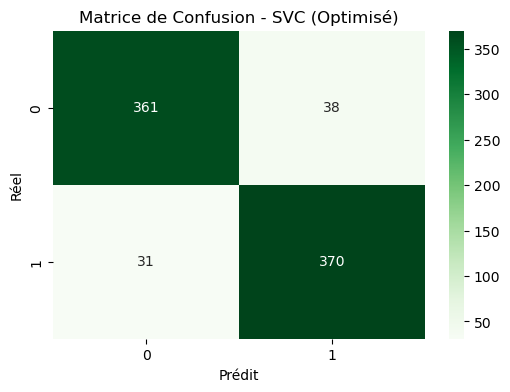

In [90]:
# Définition de la grille de paramètres
param_dist={
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1],
}

# Initialisation du modèle SVC
svc=SVC(probability=True)

# Configuration de la recherche aléatoire
randomized_search=RandomizedSearchCV(
    svc,
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

# Entraînement avec les données d'entraînement
randomized_search.fit(X_train_minmax, y_train)

# Affichage des meilleurs hyperparamètres trouvés
best_params=randomized_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Prédiction avec le meilleur modèle trouvé
best_svc_model=randomized_search.best_estimator_
svc_predicted=best_svc_model.predict(X_test_minmax)

# Évaluation
svc_acc_score=accuracy_score(y_test, svc_predicted)
svc_conf_matrix=confusion_matrix(y_test, svc_predicted)



print(classification_report(y_test,  svc_predicted))

# Matrice de confusion du modèle optimisé
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,  svc_predicted), annot=True, cmap='Greens', fmt='d')
plt.title('Matrice de Confusion - SVC (Optimisé)')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()


# 7 Comparaison

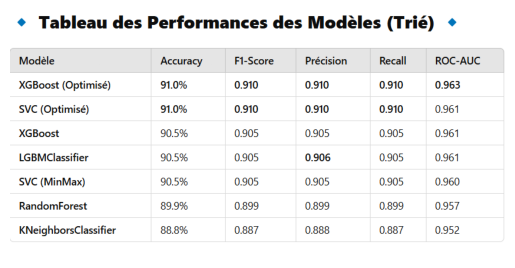

In [ ]:
image = mpimg.imread("../Images/image.png")
plt.imshow(image)
plt.axis("off")  
plt.show()

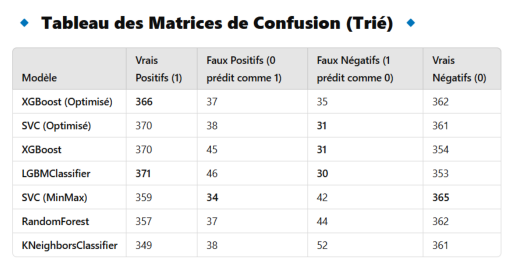

In [98]:
image1 = mpimg.imread("../Images/image2.png")
plt.imshow(image1)
plt.axis("off")  
plt.show()

- XGBoost (Optimisé) est le meilleur modèle global, car il combine une excellente précision, recall et F1-score, avec le meilleur ROC-AUC (0.963), garantissant une meilleure séparation des classes.

- SVC (Optimisé) est également un très bon choix, notamment si les données sont bien scalées.

## 8 Courbe ROC des deux meilleurs modeles

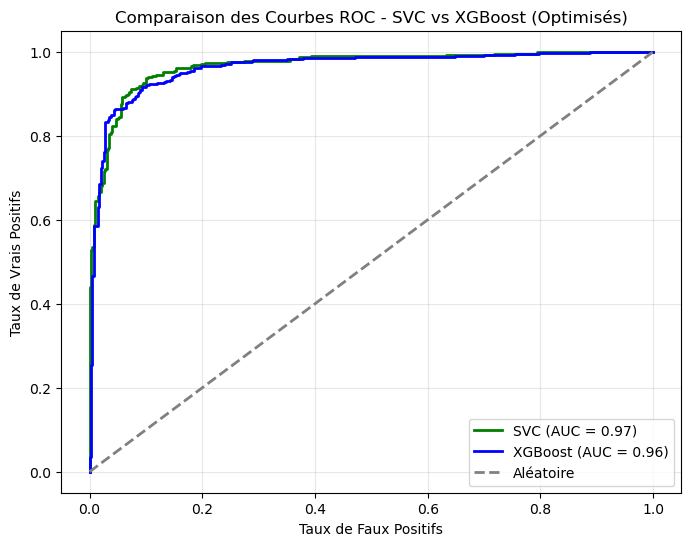

In [92]:
# Probabilités pour la classe positive (SVC Optimisé)
y_prob_svc=best_svc_model.decision_function(X_test_minmax)
fpr_svc, tpr_svc, _=roc_curve(y_test, y_prob_svc)
roc_auc_svc=auc(fpr_svc, tpr_svc)

# Probabilités pour la classe positive (XGBoost Optimisé)
y_prob_xgb=best_xgb.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _=roc_curve(y_test, y_prob_xgb)
roc_auc_xgb=auc(fpr_xgb, tpr_xgb)

# Courbes ROC adaptées aux couleurs des graphiques précédents
plt.figure(figsize=(8, 6))
plt.plot(fpr_svc, tpr_svc, color='green', lw=2, label=f'SVC (AUC = {roc_auc_svc:.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='blue', lw=2, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--', label='Aléatoire')

plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Comparaison des Courbes ROC - SVC vs XGBoost (Optimisés)')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()


- SVC a une AUC de 0.97, ce qui indique un très bon pouvoir prédictif.
- XGBoost atteint une AUC de 0.96, également très performant.